In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the directory where your CSV files are stored
csv_dir = "../local/results/results"

In [15]:
# # Step 3: Organize the metrics data
# def extract_metric(df, metric_name):
#     # Look for columns starting with 'val/' or 'mean_val/'
#     relevant_columns = [col for col in df.columns if col.startswith(('val/', 'mean_val/'))]
#     metric_columns = [col for col in relevant_columns if metric_name in col]
#     return df[metric_columns]

In [28]:
# def extract_metric(df, metric_name):
#     relevant_columns = [col for col in df.columns if col.startswith(('val/', 'mean_val/'))]
#     metric_columns = [col for col in relevant_columns if metric_name in col]
#     return df[metric_columns]

In [6]:
def extract_metric(df, metric_name):
    relevant_columns = [col for col in df.columns if col.startswith(('val/'))]
    metric_columns = [col for col in relevant_columns if metric_name in col]
    return df[['subject_name'] + metric_columns]   # Include 'subject' column in the result

In [14]:
# Step 3: Process the data
# Initialize an empty dictionary to store DataFrames for each model

data_lr = {}
data_2D = {}

acc_lr_data = {}
f1_lr_data = {}
acc_2D_data = {}
f1_2D_data = {}

# Step 1: Load CSV files and extract relevant information
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith(".csv"):

        csv_file_name = os.path.splitext(csv_file)[0]
        # print(csv_file_name)
        # print(csv_file_name.split("_"))

        if len(csv_file_name.split("_")) == 3:
            task, model, subject = csv_file_name.split("_")
        else:
            task, _, model, subject = csv_file_name.split("_")
        
        df = pd.read_csv(os.path.join(csv_dir, csv_file))
        df.columns = df.columns.str.replace('mean_', '')  # Remove "mean_" prefix

        # Step 2: Separate LR and 2D data
        if task == "LR":
            if model in acc_lr_data:
                data_lr[model].append(df.assign(subject_name=subject))
            else:
                data_lr[model] = [df.assign(subject_name=subject)]
        if task == "2D":
            if model in acc_2D_data:
                data_2D[model].append(df.assign(subject_name=subject))
            else:
                data_2D[model] = [df.assign(subject_name=subject)]

# Step 3: Process the data
for model, dfs in data_lr.items():
    combined_df = pd.concat(dfs, ignore_index=True)
    acc_lr_data[model]  = extract_metric(combined_df, 'acc').set_index('subject_name').drop_duplicates()
    f1_lr_data[model] = extract_metric(combined_df, 'f1').set_index('subject_name').drop_duplicates()
    
    
for model, dfs in data_2D.items():
    combined_df = pd.concat(dfs, ignore_index=True)
    acc_2D_data[model]  = extract_metric(combined_df, 'acc').set_index('subject_name').drop_duplicates()
    f1_2D_data[model] = extract_metric(combined_df, 'f1').set_index('subject_name').drop_duplicates()


In [17]:
acc_lr_data["csp"]

,val/acc
subject_name,
S57,0.501


In [16]:
acc_2D_data["csp"]

,val/acc
subject_name,
S57,0.252314


In [10]:
# Assuming 'subject_name' is the column that contains subject names
# acc_lr_data = [(model, extract_metric(pd.concat([df.assign(subject_name=subject) for model, subject, df in task_LR_data if model == model], ignore_index=True), 'acc').set_index('subject_name').drop_duplicates()) for model, _, _ in task_LR_data]

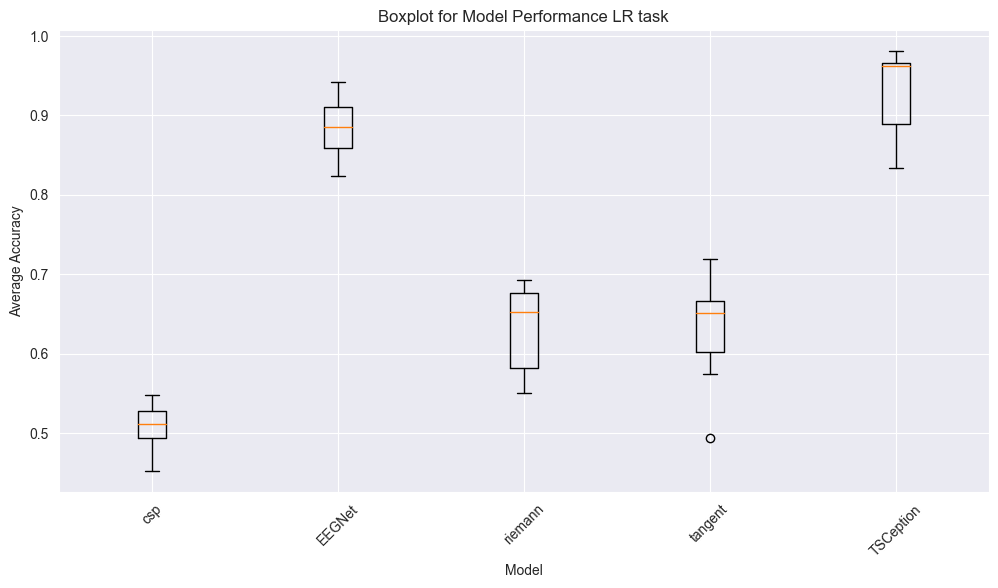

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming acc_lr_data is a dictionary where keys are model names and values are DataFrames
plt.figure(figsize=(12, 6))

x_positions = np.arange(len(acc_lr_data))

for i, (model, df) in enumerate(acc_lr_data.items()):
    avg_acc = df[['val/acc']].mean(axis=1, skipna=True)
    
    # Adjust the x position for each boxplot
    plt.boxplot(avg_acc.values, positions=[i])

    
plt.title('Boxplot for Model Performance LR task')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.xticks(x_positions, [model for model, _ in acc_lr_data.items()], rotation=45)
plt.show()


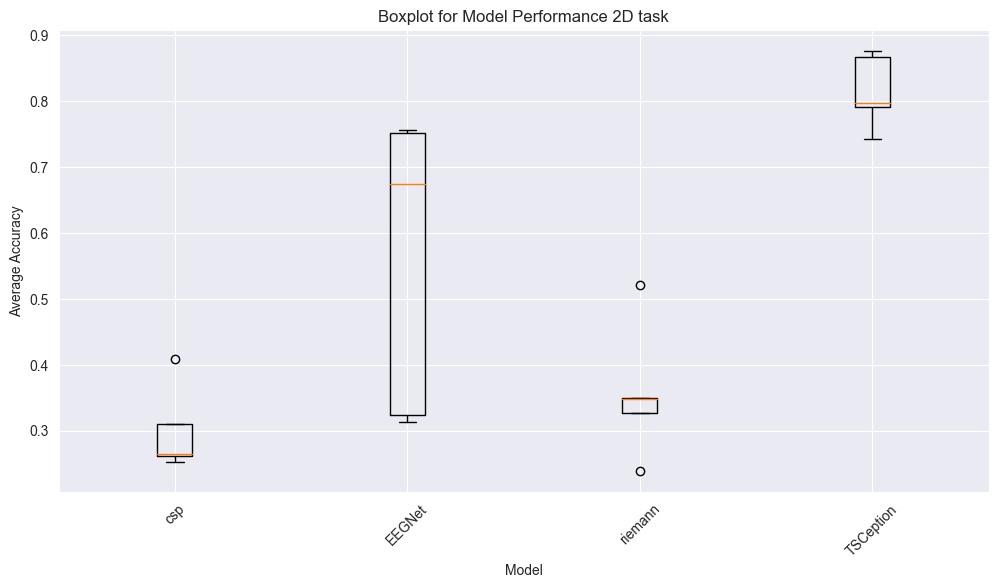

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming acc_lr_data is a dictionary where keys are model names and values are DataFrames
plt.figure(figsize=(12, 6))

x_positions = np.arange(len(acc_2D_data))

for i, (model, df) in enumerate(acc_2D_data.items()):
    avg_acc = df[['val/acc']].mean(axis=1, skipna=True)
    
    # Adjust the x position for each boxplot
    plt.boxplot(avg_acc.values, positions=[i])

    
plt.title('Boxplot for Model Performance 2D task')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.xticks(x_positions, [model for model, _ in acc_2D_data.items()], rotation=45)
plt.show()

In [1]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


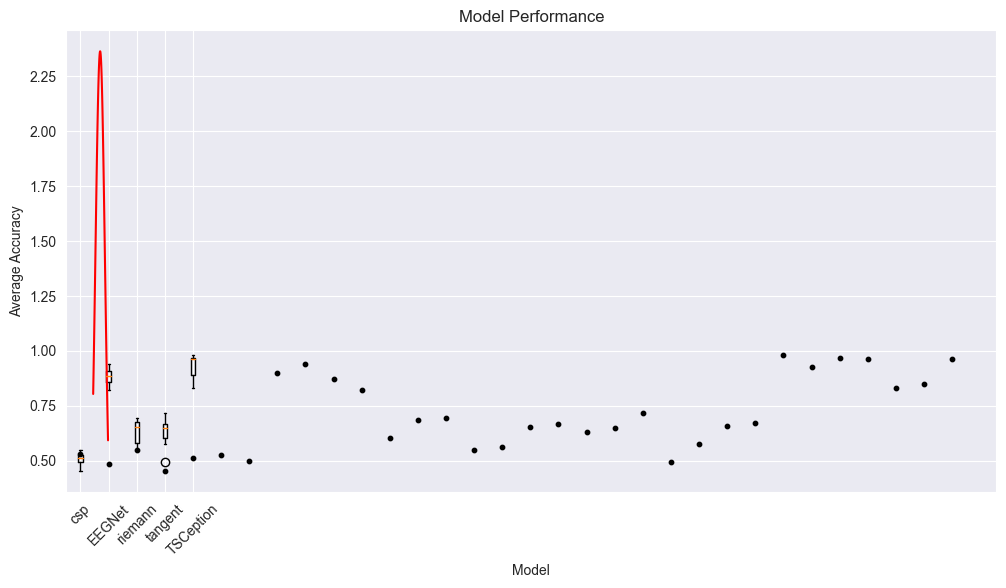

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Assuming acc_lr_data is a dictionary where keys are model names and values are DataFrames
plt.figure(figsize=(12, 6))

# Create lists to store subject names and average accuracies
subject_names = []
avg_accuracies = []

# Iterate through the acc_lr_data dictionary
for i, (model, df) in enumerate(acc_lr_data.items()):
    avg_acc = df[['val/acc']].mean(axis=1, skipna=True)
    
    # Add subject names and corresponding average accuracies
    subject_names.extend([model] * len(avg_acc))
    avg_accuracies.extend(avg_acc)
    
    # Adjust the x position for each boxplot
    plt.boxplot(avg_acc.values, positions=[i])

# Add Gaussian distribution plot
x = np.linspace(min(avg_accuracies), max(avg_accuracies), 100)
pdf = stats.norm.pdf(x, np.mean(avg_accuracies), np.std(avg_accuracies))
plt.plot(x, pdf, color='red')

# Add subject names as dots
plt.scatter(range(len(subject_names)), avg_accuracies, c='black', marker='o', s=10)

plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.xticks(range(len(acc_lr_data)), [model for model, _ in acc_lr_data.items()], rotation=45)
plt.show()
